<a href="https://colab.research.google.com/github/Pumafi/flumy-wgan-mines/blob/main/models_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# We add this line in case the user uses Google Colab
# This is not needed if you are on a local machine and installed the requirements.txt
# NB: you SHOULD restart the kernel after installing this
!python -m pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# We add this line in case the user uses Google Colab
# This is not needed if you are on a local machine and installed the requirements.txt

!python -m pip install deel.lip
!python -m pip install -i https://test.pypi.org/simple/ gstlearn

In [1]:
# From the git
import sys
sys.path.append('..')

In [2]:
import numpy as np
from data.load_data import load_data
from models.load_trained_models import load_msgen_horizontal, wgan_horizontal,\
    load_msnwgen_2d_gs_horizontal, load_wgan_gs_horizontal
from utils.visualisation import get_color_map
from metrics.evaluate_models import compare_models_morpho

2024-01-15 17:55:01.293136: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-15 17:55:01.326717: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 17:55:01.326746: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 17:55:01.326767: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 17:55:01.332967: I tensorflow/core/platform/cpu_feature_g

In [3]:
# Useful constants
slice_size = (64, 128)
cmap, norm = get_color_map(number_of_categories=4)
facies_names = np.array(["Sand, Channel lag", "Sand, Point bar", "Silts, Levee", "Shale, Overbank"])

#####################################################################################################################
#                                                                                                                   #
# /!\ WARNING: the functions are computationally heavy, you may want to adapt the batch_size to avoid kernel crash  #
#                                                                                                                   #
#####################################################################################################################

batch_size = 250

In [7]:
##############################################
# NB: This code returns a warning, ignore it #
##############################################

# Load models
models_names = ["MS-GAN with Gaussian Noise", "W-GAN-GP with GroupSort", "MS-W-GAN-SN with GroupSort"]
ms_gan_2d_horizontal = load_msgen_horizontal("../trainedweights/msgen2dh/cp-gen2d_horizontal_good.ckpt")
#wgan_2d_horizontal = wgan_horizontal("../trainedweights/wgan2d/cp-wgan2d_horiz.ckpt").generator
wgangs_2d_horizontal = load_wgan_gs_horizontal("../trainedweights/wgan_gs/cp-snwgen_horizontal_good.ckpt")
#msnw_gan_2d_horizontal = load_mswgen_sn_2d_horizontal()
msnw_gan_2d_gs_horizontal = load_msnwgen_2d_gs_horizontal("../trainedweights/msnwgen2d_gs/cp-msnwgen_maxsort_horizontal_good.ckpt")

models = [ms_gan_2d_horizontal, wgangs_2d_horizontal, msnw_gan_2d_gs_horizontal]

In [8]:
x_train = load_data(slice_size[0], slice_size[1], "../data/horizontal/dataFlumyHoriz.csv")

MS-GAN with Gaussian Noise


2024-01-15 18:02:11.141162: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


[array([87, 66, 37, ...,  0,  0,  0]), array([6639,    5,    5, ...,    0,    0,    0]), array([9, 9, 7, ..., 0, 0, 0]), array([13, 12, 11, ...,  0,  0,  0])]
W-GAN-GP with GroupSort
[array([171,  59,  56, ...,   0,   0,   0]), array([927, 817, 565, ...,   0,   0,   0]), array([13, 10, 10, ...,  0,  0,  0]), array([363, 216, 198, ...,   0,   0,   0])]
MS-W-GAN-SN with GroupSort
[array([170, 120,  92, ...,   0,   0,   0]), array([6072,   86,   17, ...,    0,    0,    0]), array([19, 11,  9, ...,  0,  0,  0]), array([28, 25, 21, ...,  0,  0,  0])]


/home/fbhavsar/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fbhavsar/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fbhavsar/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fbhavsar/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

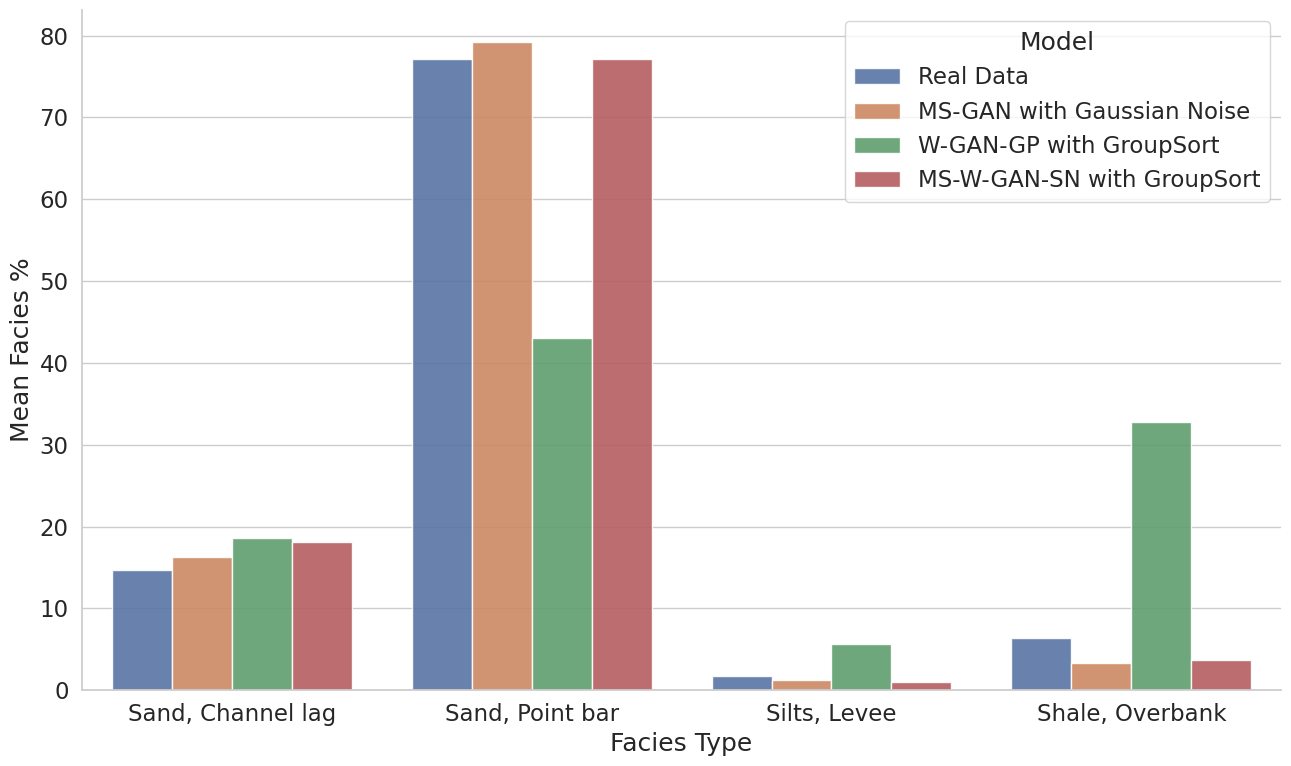

/home/fbhavsar/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fbhavsar/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fbhavsar/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fbhavsar/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

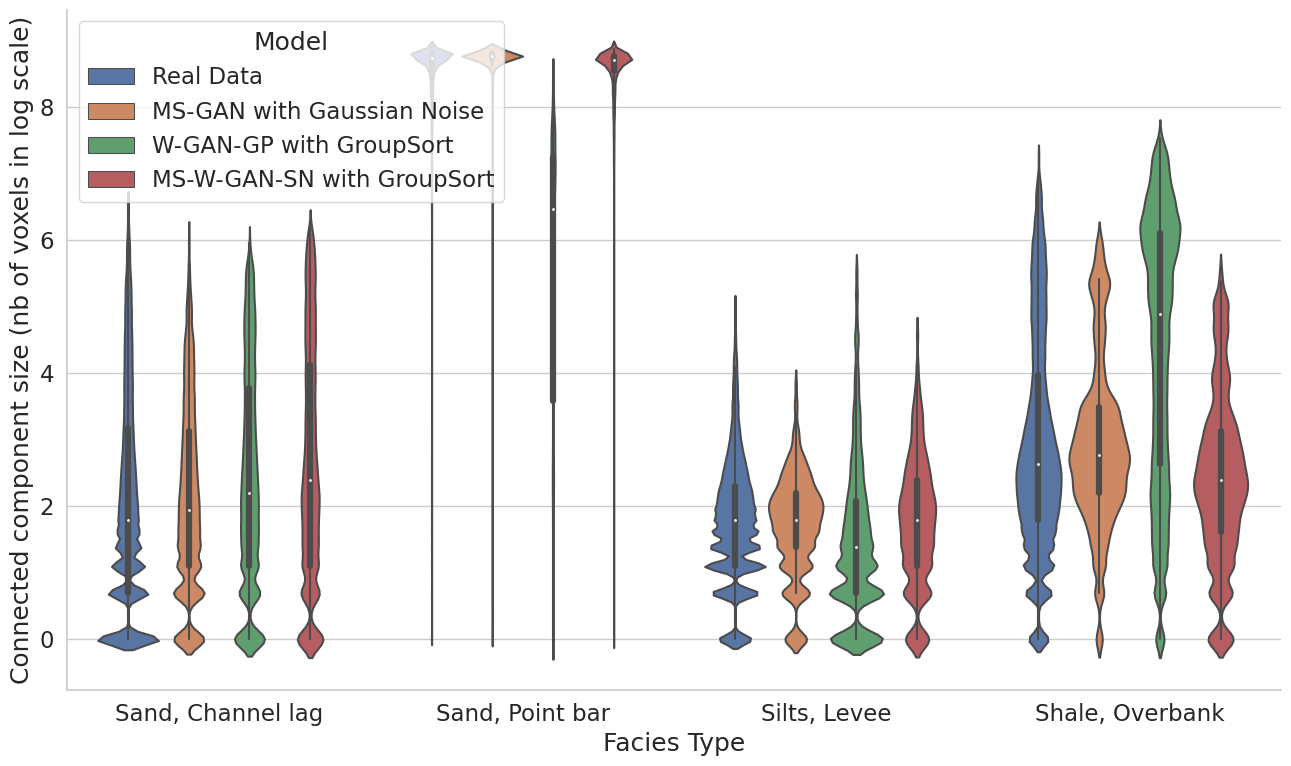

In [9]:
# Plot the morpho comparision
dict_mean_proportions, dict_connected_sizes = compare_models_morpho(x_train, models, models_names, facies_names, batch_size)